In [ ]:
import tensorflow as tf
import os
import pandas as pd
import zipfile
import shutil
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')

In [ ]:
datas_path= os.path.join('/','content','drive','MyDrive','Build a Deep CNN Image Classifier with ANY Images','Datas')
os.chdir(datas_path)
current_directory = os.getcwd()

# List all files and directories in the current directory
files_and_directories = os.listdir(current_directory)

# Filter out directories, leaving only files
files = [f for f in files_and_directories if os.path.isfile(os.path.join(current_directory, f))]

print(f'Files in {current_directory}:')
for file in files:
    print(file)

zip_file_paths=[]

for f in files:
  if f.endswith('.zip'):
    zip_file_paths.append(f)

raw_datas_path=os.path.join(datas_path, 'rawDatas')

Files in /content/drive/MyDrive/Build a Deep CNN Image Classifier with ANY Images/Datas:
traffic-sign-dataset-classification.zip
preprocessing.ipynb


In [ ]:
if os.path.exists(raw_datas_path):
    shutil.rmtree(raw_datas_path)

os.makedirs(raw_datas_path)
#os.chdir(raw_datas_path)

for zip_file_path in zip_file_paths:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_datas_path)


Files in /content/drive/MyDrive/Build a Deep CNN Image Classifier with ANY Images/Datas:
preprocessing.ipynb
traffic-sign-dataset-classification.zip


In [ ]:
# Avoiding OOM
gpus= tf.config.experimental.list_physical_devices('GPU')
#gpus= tf.config.experimental.list_physical_devices('CPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
image_exts=['jpeg','jpg','bmp','png']
classes_names_df=pd.read_csv(os.path.join(raw_datas_path,'labels.csv'))
# we only use two classes for this project
#classes_names_df=classes_names_df.iloc[[16,29]]
class_ids=classes_names_df.iloc[:,0].tolist()
classes_names=classes_names_df.iloc[:,1].tolist()
batch_size=16
datas=tf.keras.utils.image_dataset_from_directory(os.path.join(raw_datas_path,'traffic_Data','DATA'), batch_size=batch_size, image_size=(64,64))
datas=datas.map(lambda x,y:(x/255,y))
datas_iterator=datas.as_numpy_iterator()

Found 2238 files belonging to 58 classes.


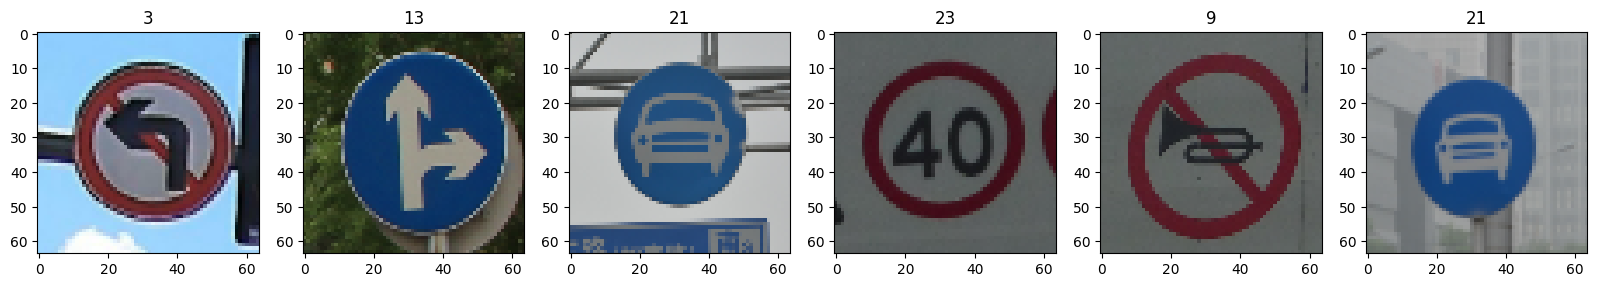

In [ ]:
test_batch=datas_iterator.next()
fig, ax=plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(test_batch[0][0:6]*255):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(test_batch[1][idx])

70

In [ ]:
print(train_size)
print(test_size)
print(validation_size)

49
7
14


In [ ]:
# len(datas) returns number of batchs
train_size=int(0.7*len(datas))
test_size=int(0.1*len(datas))
validation_size=len(datas)-train_size-test_size

train_datas=datas.take(train_size)
test_datas=datas.skip(train_size).take(test_size)
validation_datas=datas.skip(train_size + test_size).take(validation_size)


In [1]:
!git clone https://github.com/mrmalekjan/stopSignSegmentation.git

Cloning into 'stopSignSegmentation'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
Receiving objects: 100% (23/23), 10.62 KiB | 10.62 MiB/s, done.
remote: Total 23 (delta 0), reused 3 (delta 0), pack-reused 0


In [2]:
!git config --global user.email "malak1377mm@gmail.com"
!git config --global user.name "mrmalekjan"

In [3]:
#!git init ./stopSignSegmentation/
import os
os.chdir('/content/stopSignSegmentation')
#!git rm /content/stopSignSegmentation/README.md
!git status
!git reset


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git revert HEAD

error: your local changes would be overwritten by revert.
hint: commit your changes or stash them to proceed.
fatal: revert failed


In [4]:
!git show

commit 181be5f2a3163311925d9f24775c684a258a10f6 (HEAD -> main, origin/main, origin/HEAD)
Author: malekjan <82872247+mrmalekjan@users.noreply.github.com>
Date:   Mon Jul 8 18:33:56 2024 +0330

    Delete test1.py

diff --git a/test1.py b/test1.py
deleted file mode 100644
index 8418159..0000000
--- a/test1.py
+++ /dev/null
@@ -1,4 +0,0 @@
-#test1
-#test2
-#test3
-Zxxsa
\ No newline at end of file


In [5]:
os.chdir('/content/stopSignSegmentation')
!git rm -f /content/stopSignSegmentation/test1.py

fatal: pathspec '/content/stopSignSegmentation/test1.py' did not match any files


In [ ]:
!git commit -a -m "removing test1.py"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [6]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import git
repo = gitRepo.clone_from('https://github.com/username/repository', '/path/to/local/directory')
